### Implementation of a 3 Layer Neural Network

In [56]:
import numpy as np 

In [57]:
### Model Prameters
input_size=2 ## No. of features
layers=[4,3] ## No. of neuraons in first layer and second Hidden layer
output_size=2 ## output layer or total number of classes

In [58]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [59]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        self.model=dict()
        ## First Hidden Layer
        self.model['w1']=np.random.randn(input_size,layers[0])
        self.model['b1']=np.zeros((1,layers[0]))
        
        ## Second Layer
        self.model['w2']=np.random.randn(layers[0],layers[1])
        self.model['b2']=np.zeros((1,layers[1]))
        
        ## Third Layer
        self.model['w3']=np.random.randn(layers[1],output_size)
        self.model['b3']=np.zeros((1,output_size))
    def forward_propogation(self,X):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        z1=np.dot(X,w1)+b1
        a1=np.tanh(z1)    ## We are using tanhx as activation function instead of sigmoid function
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,w3)+b3
        a3=np.tanh(z3)
        y_prediction=softmax(a3)
        self.activation_outputs=(a1,a2,y_prediction)
        return y_prediction
    def back_propogation(self,X,Y,learning_rate=0.0001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=X.shape[0]
        a1,a2,y_=self.activation_outputs
        
        
        delta3=y_-Y
        dw3=(a2.T).dot(delta3)
        db3=np.sum(delta3,axis=0,keepdims=True)
        
        
        delta2=np.dot(delta3,w3.T)*((a2)*(1-a2))
        dw2=a1.T.dot(delta2)
        db2=np.sum(delta2,axis=0,keepdims=True)
        
        delta1=(delta2.dot(w2.T))*((a1)*(1-a1))
        dw1=(X.T).dot(delta1)
        db1=np.sum(delta1,axis=0,keepdims=True)
        
        
        ### Updating Our Weights and Biases
        self.model['w3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        self.model['w2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['w1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
    def summary(self):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,a3=self.activation_outputs
        
        print('W1',w1.shape)
        print('A1',a1.shape)
        
        print('W2',w2.shape)
        print('A2',a2.shape)
        
        print('W3',w3.shape)
        print('A3',a3.shape)
    def predict(self,X):
        y_out=self.forward_propogation(X)
        y_out=np.argmax(y_out,axis=1)
        return y_out

In [60]:
def one_hot(Y,classes):
    m=Y.shape[0]
    y_hot=np.zeros((m,classes))
    y_hot[np.arange(m),Y]=1
    return y_hot

In [61]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l 

### Importing Datasets

In [62]:
from sklearn.datasets import make_circles

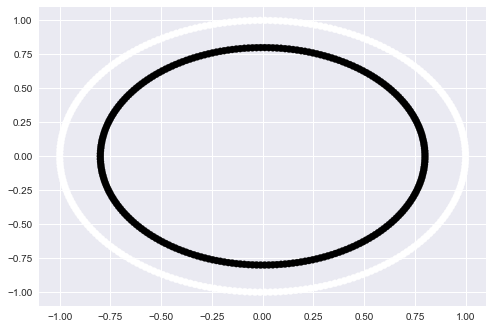

In [63]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0,random_state=1)
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Training Our Neural Network Model

In [64]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [65]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    Training_loss=[]
    classes=2
    y_hot=one_hot(Y,classes)
    for ix in range(epochs):
        y_pred=model.forward_propogation(X)
        l=loss(y_hot,y_pred)
        Training_loss.append(l)
        model.back_propogation(X,y_hot,learning_rate)
        
        if(logs):
            print('Epochs is ',ix,' ','Loss is ',l)
    return Training_loss

In [66]:
loss=train(X,Y,model,700,0.001)

Epochs is  0   Loss is  0.3534504735305337
Epochs is  1   Loss is  0.3661661138224199
Epochs is  2   Loss is  0.37438968738180484
Epochs is  3   Loss is  0.3798394207203257
Epochs is  4   Loss is  0.384211878161687
Epochs is  5   Loss is  0.38771223233051666
Epochs is  6   Loss is  0.3896605472055349
Epochs is  7   Loss is  0.3892463613684827
Epochs is  8   Loss is  0.38630884286666756
Epochs is  9   Loss is  0.38165013754556165
Epochs is  10   Loss is  0.37657511391609555
Epochs is  11   Loss is  0.37202146229216565
Epochs is  12   Loss is  0.3681993954884145
Epochs is  13   Loss is  0.364983107237774
Epochs is  14   Loss is  0.3623101698750826
Epochs is  15   Loss is  0.36018491547956877
Epochs is  16   Loss is  0.35859829998524184
Epochs is  17   Loss is  0.3575287890488744
Epochs is  18   Loss is  0.35695250517106736
Epochs is  19   Loss is  0.35683759566693174
Epochs is  20   Loss is  0.357128896906714
Epochs is  21   Loss is  0.35771704009992167
Epochs is  22   Loss is  0.3584069

Epochs is  260   Loss is  0.3177075317070304
Epochs is  261   Loss is  0.31753656913340417
Epochs is  262   Loss is  0.31736037842889897
Epochs is  263   Loss is  0.31717973611945455
Epochs is  264   Loss is  0.3169953770130506
Epochs is  265   Loss is  0.3168079866382117
Epochs is  266   Loss is  0.31661819625930254
Epochs is  267   Loss is  0.3164265801185381
Epochs is  268   Loss is  0.3162336545730632
Epochs is  269   Loss is  0.3160398788124956
Epochs is  270   Loss is  0.31584565685848476
Epochs is  271   Loss is  0.3156513405647197
Epochs is  272   Loss is  0.31545723335521175
Epochs is  273   Loss is  0.31526359446185664
Epochs is  274   Loss is  0.3150706434497222
Epochs is  275   Loss is  0.31487856484978977
Epochs is  276   Loss is  0.31468751275281376
Epochs is  277   Loss is  0.3144976152528377
Epochs is  278   Loss is  0.3143089786627786
Epochs is  279   Loss is  0.3141216914554659
Epochs is  280   Loss is  0.31393582791000557
Epochs is  281   Loss is  0.3137514514641832


Epochs is  566   Loss is  0.3130593439443363
Epochs is  567   Loss is  0.31311788014350966
Epochs is  568   Loss is  0.31304900822424697
Epochs is  569   Loss is  0.31285443774026045
Epochs is  570   Loss is  0.31254987632235925
Epochs is  571   Loss is  0.3121556024582427
Epochs is  572   Loss is  0.3116929509122138
Epochs is  573   Loss is  0.311183638532699
Epochs is  574   Loss is  0.3106495921330994
Epochs is  575   Loss is  0.3101118348743745
Epochs is  576   Loss is  0.3095863337463733
Epochs is  577   Loss is  0.30907413694998964
Epochs is  578   Loss is  0.30855126121170484
Epochs is  579   Loss is  0.3079729346795785
Epochs is  580   Loss is  0.30729017789144114
Epochs is  581   Loss is  0.3064638171619241
Epochs is  582   Loss is  0.30547314019060307
Epochs is  583   Loss is  0.30432229401724087
Epochs is  584   Loss is  0.3030436440613687
Epochs is  585   Loss is  0.3016934673135106
Epochs is  586   Loss is  0.300336726546175
Epochs is  587   Loss is  0.2990262853659473
Epo

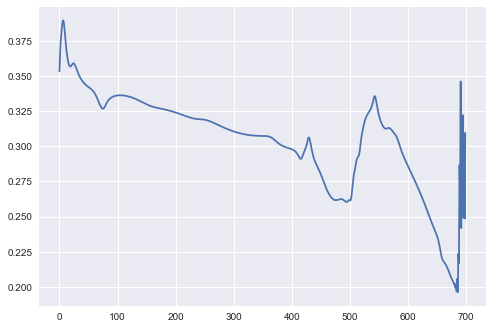

In [67]:
plt.plot(loss)

In [68]:
### Accuracy of our Model
pred=model.predict(X)
accuracy=np.sum(Y==pred)/Y.shape[0]
print(accuracy)

0.752


In [69]:
from visualize import plot_decision_boundary

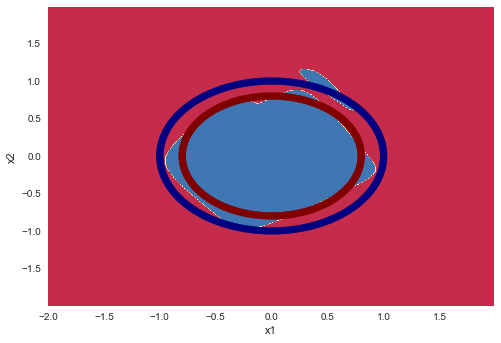

In [70]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

##### As we can see it seprates the data quite well where as in logistic regresiion our accuracy was only about 50%